# Modifying pretrained model

In [1]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

from keras import backend as K

K.set_image_dim_ordering('th')

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

# Load existing model
model = VGG_16('../vgg16_weights_th_dim_ordering_th_kernels.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activa

In [2]:
# https://github.com/jocicmarko/ultrasound-nerve-segmentation/blob/master/train.py#L19
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['categorical_crossentropy','accuracy'])
          #loss=dice_coef_loss, metrics=[dice_coef,'accuracy'])

In [38]:
from keras.models import Model
from keras.layers.convolutional import Conv2D
m = Model(inputs = model.input, outputs=model.layers[3].output)
m.trainable = False
x = model.input
x = m(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(128, 3, 3, activation='softmax')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, 3, 3, activation='softmax')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(64, 3, 3, activation='softmax')(x)

x = ZeroPadding2D((1,1))(x)

x = Conv2D(2, 3, 3, activation='softmax')(x)
m2  = Model(inputs = model.input, outputs = x)
m2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['categorical_crossentropy','accuracy'])
          #loss=dice_coef_loss, metrics=[dice_coef,'accuracy'])

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="softmax")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="softmax")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="softmax")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (3, 3), activation="softmax")`


In [39]:
m2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1_input (Inpu (None, 3, 224, 224)       0         
_________________________________________________________________
model_13 (Model)             (None, 64, 224, 224)      38720     
_________________________________________________________________
zero_padding2d_23 (ZeroPaddi (None, 64, 226, 226)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 224, 224)     73856     
_________________________________________________________________
zero_padding2d_24 (ZeroPaddi (None, 128, 226, 226)     0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 256, 224, 224)     295168    
_________________________________________________________________
zero_padding2d_25 (ZeroPaddi (None, 256, 226, 226)     0         
__________

In [129]:
initial_epoch = 30
epochs = 5
m2.fit(x_train,y_train,epochs=initial_epoch+epochs,batch_size=5,initial_epoch=initial_epoch)
#m.fit(preprocess(mri_data[:,:,20]),preprocess(labelled_data[:,:,20], False),epochs=20)

Epoch 31/35
2/2 [==============================] - 0s - loss: 606.0085 - categorical_crossentropy: 606.0085 - acc: 0.0067
Epoch 32/35
2/2 [==============================] - 0s - loss: 606.0040 - categorical_crossentropy: 606.0040 - acc: 0.0056
Epoch 33/35
2/2 [==============================] - 0s - loss: 605.9999 - categorical_crossentropy: 605.9999 - acc: 0.0056
Epoch 34/35
2/2 [==============================] - 0s - loss: 605.9960 - categorical_crossentropy: 605.9959 - acc: 0.0056
Epoch 35/35
2/2 [==============================] - 0s - loss: 605.9915 - categorical_crossentropy: 605.9914 - acc: 0.0045


In [61]:
# Get image data w/ nibabel
import nibabel as nib
def get_data(filename):
    img = nib.load(filename)
    return img.get_data()
def scale(array):
    return (array-np.min(array))/(np.max(array) - np.min(array))    
mri_data = scale(get_data('../data/case_002_2.nii.gz')).transpose((2,0,1))
labelled_data = get_data('../data/case_002_labels.nii.gz').transpose((2,0,1))

In [16]:
from scipy.misc import imresize

def preprocess(mri_slice,tile=True):
    img0 = imresize(mri_slice, (224,224))
    img0.resize((img0.shape[0],img0.shape[1],1))
    if tile: img0 = np.tile(img0,3)
    img0 = img0.transpose((2,0,1))
    return np.expand_dims(img0, axis=0)
def preprocess_label(labels):
    labels = imresize(labels, (224,224))
    pos = np.where(labels==1)
    new_labels = np.zeros([labels.shape[0],labels.shape[1],2])
    new_labels[:,:,0] = 1
    new_labels[pos[0],pos[1],0] = 0
    new_labels[pos[0],pos[1],1] = 1
    new_labels = new_labels.transpose((2,0,1))
    return np.expand_dims(new_labels, axis=0)


In [74]:
dice_coef(y_train[0],y_train[0])

<tf.Tensor 'truediv_21:0' shape=() dtype=float64>

In [127]:
label_sums = labelled_data.sum(axis=(1,2))
x_train_arr = []
y_train_arr = [] 
#for mri_slice, labels in zip(mri_data, labelled_data):
for mri_slice, labels in zip(mri_data[np.where(label_sums>0)], labelled_data[np.where(label_sums>0)]):
    x_train_arr.append(preprocess(mri_slice))
    y_train_arr.append(preprocess_label(labels))
x_train = np.vstack(x_train_arr)
y_train = np.vstack(y_train_arr)

In [ ]:
np.histogram(img,bins=20)

In [46]:
m.save('model_4_128_256_64.h5')

In [15]:
#img= model.predict(preprocess(mri_data[24])).squeeze()

#img[np.argmax(img, axis=0)]
pos = np.where(np.argmax(img, axis=0)>0)
img0 = np.zeros((img.shape[1],img.shape[2]))
img0[pos[0],pos[1]] = 1

In [104]:
#np.amax(img,0).shape
pos = np.where(np.argmax(img, axis=0)>0)
img0 = np.zeros((img.shape[1],img.shape[2]))
img0[pos[0],pos[1]] = img[1,pos[0],pos[1]]

In [114]:
img0.max()

1.0

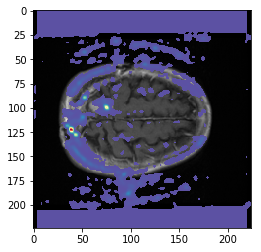

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

predict_slide = 21
img= m2.predict(preprocess(mri_data[predict_slide])).squeeze()
pos = np.where(np.argmax(img, axis=0)>0)
img1 = np.zeros((img.shape[1],img.shape[2]))
#img1[pos[0],pos[1]] = 1
img1[pos[0],pos[1]] = img[1,pos[0],pos[1]]
img1/=img1.max()
#img1=img[1]
fig, ax = plt.subplots(1,1)
#img1 = np.copy(img)
#img1[img<1] = 0
#ax.imshow(new_data)
ax.imshow(imresize(mri_data[predict_slide], (224,224)),cmap=plt.cm.gray)
#ax.imshow(img1)
ax.imshow(np.ma.masked_where(img1<=0, img1),interpolation='none',cmap = plt.cm.Spectral_r,)

if labelled_data[predict_slide].sum() > 0:
    actual = imresize(labelled_data[predict_slide], (224,224))
    ax.imshow(np.ma.masked_where(actual==0, actual),alpha=.2,cmap=plt.cm.autumn, interpolation='none')
#plt.imshow(np.squeeze(img))

In [ ]:
img  
np.where((img>.5))[0]

In [ ]:
plt.imshow(preprocess(labelled_data[22], False).squeeze())
#plt.imshow(labelled_data[22])
labelled_data[20].sum()

In [ ]:

label_sums = labelled_data.sum(axis=(1,2))
train_data = mri_data[np.where(label_sums==1)]
for i in range(0, mri_data.shape[2]):
    if skip_empty_slices:
        if np.sum(labelled_data[:,:,i]) == 0: continue
    train.append[i]
md = imresize(mri_data.transpose((2,0,1)), (33,224,224))
md.shape

In [ ]:
# Get image data w/ nibabel
import nibabel as nib
def get_data(filename):
    img = nib.load(filename)
    return img.get_data()
def scale(array):
    return (array-np.min(array))/(np.max(array) - np.min(array))
mri_data = scale(get_data('../data/case_001_2.nii.gz'))
# Generate input to model (shape=(1,3,224,224))
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.misc import imresize
#plt.tight_layout()
img0 = imresize(mri_data[:,:,24], (224,224))
img = plt.imshow(img0) 

img0.resize((img0.shape[0],img0.shape[1],1))
img0_rgb = np.tile(img0,3)
img0_rgb = img0_rgb.transpose((2,0,1))
img0_rgb = np.expand_dims(img0_rgb, axis=0)
img0_rgb.shape

In [ ]:
print(model.summary())

In [ ]:
from keras.models import Model

def get_intermediate(layer_name,inp):
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    return np.squeeze(intermediate_layer_model.predict(inp))
import math
def show_range(data, plot_range):
    #plot_range = range(0,derp.shape[0],10)
    i = 0
    
    f, axarr = plt.subplots(math.ceil(len(plot_range)/3), 3)
    f.set_size_inches([10,10])
    for i in range(len(plot_range)):
        if len(axarr.shape)==1:
            ax = axarr[i]
        else:
            ax = axarr[int(i/3),i%3]
        ax.imshow(data[plot_range[i]])
        ax.set_title("Node %d"%plot_range[i])
    plt.show()

In [ ]:
layer_name = 'conv2d_2'
out_conv2d_2 = get_intermediate(layer_name,img0_rgb)
show_range(out_conv2d_2, range(1,out_conv2d_2.shape[0],10))

In [ ]:
import keras
keras.backend.image_data_format()